## 원본 데이터 데이터세트 만들기

이 장은 처음 (주)injewelme에서 받은 원본데이터를 학습 데이터세트를 구축하는 첫 .ipynb이다.
받은 원본데이터는 
1. 서울 소재초등학교 327명 
2. 제주 소재초등학교 84명
이다.

### 원본 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir("..")
path=os.getcwd()

In [3]:
path

'c:\\jupyter\\Explainable Healthcare framework\\Explainable_healthcareframework'

In [5]:
df_seoul=pd.read_excel(path+"\\data\\1.원본 데이터_통합본_서울초.xlsx",sheet_name=None)
df_jeju=pd.read_excel(path+"\\data\\1.원본 데이터_통합본_제주초.xlsx",sheet_name=None)

# # 서울초등학교 일때
# df=df_seoul

# 제주초등학교일때
df=df_jeju

In [9]:
df_user = df['User']
df_body = df['Body']
# df_offline = df['오프라인 측정']
# df_mediator = df['중재군 특별미션 정보']
df_stepcount = df['Step Count']
df_exercise = df['Exercise']
df_nutrition= df['Nutrition']
df_sleep= df['Sleep']
# df_rewqrd= df['리워드 데이터']
# df_competition=df['대결 데이터']

# 통합 시트 만들기

### Body 전처리

Height와 Weight 정보를 불러와 동일한 날짜 기준으로 평균값을 정리합니다.
이는 같은 날짜에 서로 다른 시간대에 측정된 데이터가 기록된 경우를 고려하기 위함입니다.

In [10]:
df_body['collect_datetime'] = pd.to_datetime(df_body['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_body = df_body.groupby(['ID', 'collect_datetime']).mean().reset_index()

len(grouped_df_body['ID'].unique())

82

In [11]:
grouped_df_body.shape

(944, 4)

### Stepcount 전처리

stepcount 동일한 날짜 기준으로 값을 SUM 해서 총합으로 정리합니다.

In [12]:
# 통일된 컬럼명을 위해 아래와 같이 이름을 바꿔준다.
df_stepcount.rename(columns={'date': 'collect_datetime','step_count': 'step count'}, inplace=True)

df_stepcount['collect_datetime'] = pd.to_datetime(df_stepcount['collect_datetime']).dt.strftime('%Y-%m-%d')

grouped_df_stepcount= df_stepcount.groupby(['ID', 'collect_datetime']).sum().reset_index()

### Exercise 전처리

운동량인 burned calory는 오타가 있어기에 burned calorie로 수정하였습니다.
또한 동일날짜내에 여러기록이 있는 경우가 있어 날짜별로 groupby를 수행하였고 sum을 진행하였습니다. 

In [13]:
df_exercise=df_exercise[['ID',"date","burned calory(Kcal)"]]
df_exercise.rename(columns={'date': 'collect_datetime','burned calory(Kcal)': 'burned calorie'}, inplace=True)
df_exercise['collect_datetime'] = pd.to_datetime(df_exercise['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_exercise= df_exercise.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\2006701501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exercise.rename(columns={'date': 'collect_datetime','burned calory(Kcal)': 'burned calorie'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\2006701501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exercise['collect_datetime'] = pd.to_datetime(df_exercise['collect_datetime']).dt.strftime('%Y-%m-%d')


### Nutrition 전처리

칼로리 섭취량도 이름표기 수정  
또한 날짜별 groupby를 해서 칼로리 총합 계산

In [14]:
df_nutrition=df_nutrition[['ID',"date","eat_calory(Kcal)"]]
df_nutrition.rename(columns={'date': 'collect_datetime','eat_calory(Kcal)': 'eat calorie'}, inplace=True)
df_nutrition['collect_datetime'] = pd.to_datetime(df_nutrition['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_nutrition= df_nutrition.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\1437399790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutrition.rename(columns={'date': 'collect_datetime','eat_calory(Kcal)': 'eat calorie'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\1437399790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutrition['collect_datetime'] = pd.to_datetime(df_nutrition['collect_datetime']).dt.strftime('%Y-%m-%d')


### Sleep 전처리

수면시간도 이름표기 수정  
또한 날짜별 groupby를 해서 수면시간 총합 계산

In [15]:
df_sleep=df_sleep[['ID',"date","total_sleep_minute"]]
df_sleep.rename(columns={'date': 'collect_datetime','total_sleep_minute': 'sleep time'}, inplace=True)
df_sleep['collect_datetime'] = pd.to_datetime(df_sleep['collect_datetime']).dt.strftime('%Y-%m-%d')
grouped_df_sleep= df_sleep.groupby(['ID', 'collect_datetime']).sum().reset_index()

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\2146755943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep.rename(columns={'date': 'collect_datetime','total_sleep_minute': 'sleep time'}, inplace=True)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\2146755943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sleep['collect_datetime'] = pd.to_datetime(df_sleep['collect_datetime']).dt.strftime('%Y-%m-%d')


### 데이터 시트 merge

서울초등학교 실험기간은 2022-07-14~2023-01-11이므로 다음날짜 기간에 해당하는 데이터프레임 만들기  
인원 수 총 327명

In [19]:
# 필터링 기준 날짜 설정
start_date = '2023-09-18'
end_date = '2023-11-12'

In [20]:
len(grouped_df_body['ID'].unique())

82

In [21]:
grouped_df_body

,ID,collect_datetime,height,weight
0,#AGEKKL,2023-09-08,143.0,33.0
1,#AGEKKL,2023-09-10,143.0,33.0
2,#AGEKKL,2023-09-11,143.0,33.0
3,#AGEKKL,2023-09-18,143.0,33.0
4,#AGEKKL,2023-09-20,143.0,33.1
...,...,...,...,...
939,#ZPOZWB,2023-10-25,150.2,44.3
940,#ZPOZWB,2023-11-01,150.2,44.8
941,#ZPOZWB,2023-11-03,150.2,44.4
942,#ZPOZWB,2023-11-06,150.4,45.1


In [22]:
date_range = pd.date_range(start=start_date, end=end_date)

# 각 ID에 대해 날짜 범위를 반복하여 데이터프레임 생성
data = {
    'ID': np.repeat(grouped_df_body['ID'].unique(),  len(date_range)),
    'collect_datetime': list(date_range) * len(grouped_df_body['ID'].unique())
}

df = pd.DataFrame(data)

In [23]:
# 해당하는 날짜에 각 변수데이터 맵핑: 키, 몸무게, 먹은 칼로리,걸음수,수면시간,태운 칼로리량
grouped_df_body['collect_datetime'] = pd.to_datetime(grouped_df_body['collect_datetime'])
grouped_df_stepcount['collect_datetime'] = pd.to_datetime(grouped_df_stepcount['collect_datetime'])
grouped_df_nutrition['collect_datetime'] = pd.to_datetime(grouped_df_nutrition['collect_datetime'])
grouped_df_exercise['collect_datetime'] = pd.to_datetime(grouped_df_exercise['collect_datetime'])
grouped_df_sleep['collect_datetime'] = pd.to_datetime(grouped_df_sleep['collect_datetime'])

In [24]:
# 전체 하나의 데이터프레임으로 merge
filtered_df = pd.merge(df, grouped_df_body, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_stepcount, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_nutrition, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_exercise, on=['ID', 'collect_datetime'], how='left')
filtered_df = pd.merge(filtered_df, grouped_df_sleep, on=['ID', 'collect_datetime'], how='left')

In [25]:
# User 정보 맵핑을 위한 전처리
df_user = df_user.drop(index=0)
# 인덱스를 재설정
df_user = df_user.reset_index(drop=True)
df_user_g=df_user[['ID','gender','grade']]

In [26]:
filtered_df = pd.merge(filtered_df, df_user_g, on='ID', how='left')


In [27]:
filtered_df.isnull().sum()

ID                     0
collect_datetime       0
height              3919
weight              3919
step count          1952
eat calorie         2519
burned calorie      4158
sleep time          2592
gender                 0
grade                  0
dtype: int64

In [28]:
filtered_df.shape

(4592, 10)

## 이탈자 제거

휴리스틱한 방법으로 아래 아이디는 이탈자로 기록(Injewelme 측에서 기록되어 고지)되어 제거

In [29]:
ID_name=['#LTLEKW','#ZFKAAY','#HUPKFW','#HTITUK','#QWBXZB']

In [30]:
filtered_df = filtered_df[~filtered_df['ID'].isin(ID_name)]

In [31]:
filtered_df.to_csv(path+'\\data\\2.원본데이터 필터링후 전처리 전_서울초.csv',encoding="cp949",index=False)

## 이상치 전처리_from 급식식단정보

위 데이터세트는 서울초등학교의 급식식단 정보(3.서울초_급식식단정보)를 크롤링한 자료를 사용  
사용이유: 모든 일별 데이터를 사용자가 기록하지 못하기 때문에 한끼만 기록하거나 결측치가 있는 경우가 많다    
따라서 한끼만 기록된 경우는 곱하기 3으로 하고 결측일 경우 본 급식정보를 칼로리에서 곱하기 3으로 하려 한다.  

In [38]:
df_dietboard=pd.read_csv(path+"\\data\\3.제주초_급식식단정보.csv")

In [39]:
df_dietboard.head()

,시도교육청코드,시도교육청명,행정표준코드,학교명,식사코드,식사명,급식일자,급식인원수,요리명,원산지정보,칼로리정보,영양정보,수정일자
0,T10,제주특별자치도교육청,9296181,하귀일초등학교,2,중식,20230918,613.0,*검정쌀현미찹쌀밥 <br/>*등뼈감자탕 (5.6.10)<br/>*고구마줄기무침 (5...,쇠고기(종류) : 제주산한우<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기 :...,636.9 Kcal,탄수화물(g) : 86.8<br/>단백질(g) : 27.9<br/>지방(g) : 1...,20230925
1,T10,제주특별자치도교육청,9296181,하귀일초등학교,2,중식,20230919,701.0,*보리밥 <br/>*시래기된장국 (5.6)<br/>*도토리묵치커리무침 (5.6.13...,쇠고기(종류) : 제주산한우<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기 :...,635.8 Kcal,탄수화물(g) : 85.5<br/>단백질(g) : 29.6<br/>지방(g) : 1...,20230926
2,T10,제주특별자치도교육청,9296181,하귀일초등학교,2,중식,20230920,701.0,*동초나물무침 (5.6)<br/>*치킨커틀렛 (1.2.5.6.12.13.15)<br...,쇠고기(종류) : 제주산한우<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기 :...,664.9 Kcal,탄수화물(g) : 85.3<br/>단백질(g) : 37.5<br/>지방(g) : 1...,20230927
3,T10,제주특별자치도교육청,9296181,하귀일초등학교,2,중식,20230921,701.0,*통곡물현미밥 <br/>*콩나물김칫국 (5.6.9)<br/>*감자조림 (5.6.13...,쇠고기(종류) : 제주산한우<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기 :...,540.5 Kcal,탄수화물(g) : 88.7<br/>단백질(g) : 21.0<br/>지방(g) : 1...,20230928
4,T10,제주특별자치도교육청,9296181,하귀일초등학교,2,중식,20230922,701.0,*무된장국 (5.6)<br/>*마파두부덮밥(채식) (5.6.12.13.18)<br/...,쇠고기(종류) : 제주산한우<br/>쇠고기 식육가공품 : 국내산<br/>돼지고기 :...,658.4 Kcal,탄수화물(g) : 99.1<br/>단백질(g) : 24.0<br/>지방(g) : 1...,20230929


In [40]:
# 필요한 컬럼정보만 남기고 필터링
filtered_df_new=df_dietboard[['학교명','급식일자','요리명','칼로리정보']]

In [41]:
filtered_df_new['급식일자'] = filtered_df_new['급식일자'].astype(str) # 급식일자 일단 string으로 전환 이상한 오류가 datetime에서 뜸
filtered_df_new['급식일자'] = pd.to_datetime(filtered_df_new['급식일자'], format='%Y%m%d') # 급식일자를 년월일로 바꿈
filtered_df_new['칼로리정보'] = filtered_df_new['칼로리정보'].str.replace(r'Kcal', '', regex=True).astype("float") # 칼로리 정보만 추출하기 위래 정규화를 통해 필터링

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\3307377459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_new['급식일자'] = filtered_df_new['급식일자'].astype(str) # 급식일자 일단 string으로 전환 이상한 오류가 datetime에서 뜸
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\3307377459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_new['급식일자'] = pd.to_datetime(filtered_df_new['급식일자'], format='%Y%m%d') # 급식일자를 년월일로 바꿈
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\3307377459.py:3: SettingWithC

In [42]:
### 급식일자 기준으로 merge

In [43]:
merge_cafeteria_kcal=filtered_df_new[['급식일자', '칼로리정보']]

In [44]:
merged_df = pd.merge(filtered_df, merge_cafeteria_kcal,  left_on='collect_datetime', right_on='급식일자', how='left')
merged_df.to_csv(path+"\\data\\4.서울초_급식정보&최종데이터세트.csv",encoding="cp949",index=False)

## 데이터 전처리

순차적으로 height,weight,eat calorie, step count, sleep time, burned calorie 전처리

In [45]:
sorted_total = merged_df.sort_values(by=['ID', 'collect_datetime']).reset_index(drop=True)

### height, weight 결측치 전처리

In [46]:
from Datapreprocessing.HeighWeight_preprocessing import DataProcessor # 선형보간법으로 채우고 그래도 안

processor = DataProcessor(sorted_total)
sorted_total_processor=processor.get_processed_data()

In [47]:
sorted_total_processor.isnull().sum()

ID                     0
collect_datetime       0
height                 0
weight                 0
step count            92
eat calorie          253
burned calorie      2128
sleep time           718
gender                 0
grade                  0
급식일자                1617
칼로리정보                  0
dtype: int64

### 다른 모든 변수 전처리

In [48]:
# 일단 ID 그룹별 step count, sleeptime, burned calorie 중앙값을 대체


import pandas as pd
import numpy as np

# 데이터프레임이 df_result2라고 가정
# ID 그룹별로 중앙값 계산하여 결측치 대체
def fill_missing_with_median_by_id(df):
    # 대체할 컬럼들
    columns_to_fill = ['step count', 'sleep time', 'burned calorie']
    
    # 결과 데이터프레임 복사
    result_df = df.copy()
    
    # ID별로 그룹화하여 각 컬럼의 중앙값으로 결측치 채우기
    for column in columns_to_fill:
        # 각 ID 그룹별 중앙값 계산
        medians = result_df.groupby('ID')[column].transform('median')
        
        # 결측치를 해당 ID의 중앙값으로 대체
        result_df[column] = result_df[column].fillna(medians)
    
    return result_df

# 함수 적용
df_filled = fill_missing_with_median_by_id(sorted_total_processor)



In [49]:
import pandas as pd
import numpy as np

def remove_high_missing_rate_ids(df, threshold=0.9, min_columns=2):
    # 결과 데이터프레임 복사
    result_df = df.copy()
    
    # 확인할 컬럼들
    columns_to_check = ['step count', 'eat calorie', 'burned calorie', 'sleep time']
    
    # ID별 결측치 비율 계산
    missing_ratios = pd.DataFrame()
    
    for column in columns_to_check:
        # ID별로 해당 컬럼의 결측치 비율 계산
        column_missing = result_df.groupby('ID')[column].apply(lambda x: x.isna().mean())
        missing_ratios[column] = column_missing
    
    # 각 ID별로 threshold 이상 결측치를 가진 변수의 개수 계산
    high_missing_counts = (missing_ratios >= threshold).sum(axis=1)
    
    # min_columns 이상의 변수에서 높은 결측치를 가진 ID 식별
    ids_to_drop = high_missing_counts[high_missing_counts >= min_columns].index.tolist()
    
    if ids_to_drop:
        print(f"총 {len(ids_to_drop)}개 ID가 {min_columns}개 이상 변수에서 {threshold*100}% 이상 결측치를 가져 제거됩니다.")
        
        # 해당 ID 제거
        result_df = result_df[~result_df['ID'].isin(ids_to_drop)]
    else:
        print(f"{min_columns}개 이상 변수에서 {threshold*100}% 이상 결측치를 가진 ID가 없습니다.")
    
    # 남은 ID 수 계산
    remaining_ids = result_df['ID'].nunique()
    print(f"남은 ID 수: {remaining_ids}")
    
    return result_df

# 함수 적용 (2개 이상 변수에서 90% 이상 결측)
df_cleaned = remove_high_missing_rate_ids(df_filled, threshold=0.9, min_columns=3)

# 결과 데이터프레임 정보 출력
print(f"원본 데이터프레임 크기: {df_filled.shape}")
print(f"정제된 데이터프레임 크기: {df_cleaned.shape}")

3개 이상 변수에서 90.0% 이상 결측치를 가진 ID가 없습니다.
남은 ID 수: 77
원본 데이터프레임 크기: (4312, 12)
정제된 데이터프레임 크기: (4312, 12)


In [50]:
# 전체 중앙값으로 결측치 채우기
columns_to_fill = ['step count', 'burned calorie', 'sleep time']
for col in columns_to_fill:
   median_value = df_cleaned[col].median()
   df_cleaned[col] = df_cleaned[col].fillna(median_value)
   print(f"{col}: {median_value:.2f} 값으로 결측치 채움")

step count: 4037.50 값으로 결측치 채움
burned calorie: 58.31 값으로 결측치 채움
sleep time: 490.00 값으로 결측치 채움


### Eat calorie 전처리

모든 데이터가 1회 기록 되었고 3끼 먹었다고 가정하여 확장

In [51]:
df_eat=df_cleaned

In [52]:
df_eat['eat calorie'].describe() # 아래와 같은 사분위값으로 나옴

count     4059.000000
mean      1016.866839
std        870.490868
min          3.000000
25%        430.339286
50%        730.650000
75%       1351.100000
max      10865.000000
Name: eat calorie, dtype: float64

In [53]:
total_eat=df_eat['eat calorie']
total_eat=total_eat.dropna()
total_eat_np=total_eat.to_numpy()

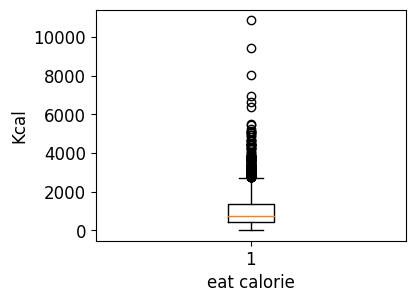

In [54]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots()

ax.boxplot(total_eat_np)
ax.set_xlabel('eat calorie')
ax.set_ylabel('Kcal')

plt.show()

In [55]:
df_eat.loc[df_eat['eat calorie'] < 100, 'eat calorie'] = np.nan # 100 칼로리는 너무 적으므로 이상치로 널값으로 대체
df_eat.loc[df_eat['eat calorie'] > 4000, 'eat calorie'] = np.nan # 100 칼로리는 너무 적으므로 이상치로 널값으로 대체

df_eat['eat calorie']=df_eat['eat calorie']*3 # 권장 칼로리가 약 2200칼로리인데 대부분 941 칼로리로 대부분 미달인 상태 하루 한끼 내지 두끼만 기록된 것으로 보임
                                              # 따락서

In [56]:
df_eat['eat calorie'].describe() # 그러면 아래와 같은 사분위값이 나오게 된다

count     3909.000000
mean      3022.215690
std       2283.832319
min        304.227273
25%       1359.000000
50%       2246.307692
75%       4059.000000
max      11899.000000
Name: eat calorie, dtype: float64

### Eat calorie 결측치 채우기

경우의 수  
1. 널값인데 해당일에 급식 칼로리정보가 있는 경우
2. 널값인데 해당일에 급식 칼로리정보가 없는 경우

### eat calorie는 널값인데 급식 칼로리정보가 있는 경우
급식칼로리 정보*3을 해서 널값을 채운다.

In [57]:
# 조건에 맞는 행을 한 번에 처리 (훨씬 더 효율적)
mask = pd.isna(df_eat["eat calorie"]) & pd.notna(df_eat["칼로리정보"])
df_eat.loc[mask, "eat calorie"] = df_eat.loc[mask, "칼로리정보"] * 1.5 * 3 # 급식에 있는 최소 칼로리 정보 보다 1.5배(많이 먹는다)하고 곱하기 3

### 큰 이상치 선별하기

In [58]:
upper_calorie_threshold=4000 # 60% 이상인 값을 상향 이상치로 설정
grouped = df_eat.groupby('ID')

In [60]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# 임계값 설정
upper_calorie_threshold = 4000

def MinMax_eatcalorie(df):
   # 작업할 데이터프레임 복사
   result = df.copy()
   
   # 유효한 eat calorie 데이터 마스크
   mask = result['eat calorie'].notna()
   
   if mask.any():  # 유효한 데이터가 있는 경우만 처리
       # 최대값 계산 (유효한 데이터만 사용)
       valid_eat_calories = result.loc[mask, 'eat calorie']
       max_val = valid_eat_calories.max()
       
       # 임계값 초과 데이터 처리
       over_threshold = (result['eat calorie'] > upper_calorie_threshold) & mask
       if over_threshold.any() and max_val > upper_calorie_threshold:
           # 스케일링 계산 (임시 변수로만 사용)
           scaling_factor = (valid_eat_calories - upper_calorie_threshold) / (max_val - upper_calorie_threshold)
           
           # 임계값 초과 데이터 처리 (원본 eat calorie 컬럼 값 직접 수정)
           result.loc[over_threshold, 'eat calorie'] = upper_calorie_threshold * (1 + scaling_factor.loc[over_threshold])
   
   return result

# 메인 처리 부분
df_total = pd.DataFrame()
for _, group in grouped:
   # MinMaxScaler 적용 및 임계값 처리
   processed_group = MinMax_eatcalorie(group)
   
   # 결과에 추가
   df_total = pd.concat([df_total, processed_group], axis=0)

# 인덱스 리셋
df_total = df_total.reset_index(drop=True)

### 원본 데이터하고 결합

In [61]:
df_total

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#AGEKKL,2023-09-18,143.0,33.0,888.0,2866.05,64.8552,466.0,2,5,2023-09-18,636.9
1,#AGEKKL,2023-09-19,143.0,33.0,7865.0,1158.00,68.9700,379.0,2,5,2023-09-19,635.8
2,#AGEKKL,2023-09-20,143.0,33.1,9243.0,3759.00,18.5920,430.0,2,5,2023-09-20,664.9
3,#AGEKKL,2023-09-21,143.0,33.1,7820.0,2358.00,47.4100,474.0,2,5,2023-09-21,540.5
4,#AGEKKL,2023-09-22,143.0,33.6,4653.0,1641.00,47.9450,423.0,2,5,2023-09-22,658.4
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,#ZPOZWB,2023-11-08,150.4,45.1,745.0,2472.00,58.3100,312.0,2,5,2023-11-08,664.4
4308,#ZPOZWB,2023-11-09,150.4,45.1,837.0,2418.00,58.3100,384.0,2,5,2023-11-09,527.2
4309,#ZPOZWB,2023-11-10,150.4,45.1,837.0,2418.00,58.3100,384.0,2,5,2023-11-10,688.5
4310,#ZPOZWB,2023-11-11,150.4,45.1,837.0,2418.00,58.3100,384.0,2,5,NaT,688.5


## Step Count 전처리

In [62]:
df_total['step count'].describe()

count     4312.000000
mean      5019.005926
std       4414.555493
min          0.000000
25%       1307.650000
50%       4037.500000
75%       7757.000000
max      41340.000000
Name: step count, dtype: float64

In [63]:
#10000보 이상 걸음 걸이수에 대해 스무딩

upper_stepcount_threshold=10000
grouped = df_total.groupby('ID')

In [64]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# 임계값 설정
upper_stepcount_threshold = 10000

def MinMax_step_count(df):
   # 작업할 데이터프레임 복사
   result = df.copy()
   
   # 유효한 step count 데이터 마스크
   mask = result['step count'].notna()
   
   if mask.any():  # 유효한 데이터가 있는 경우만 처리
       # 최대값 계산 (유효한 데이터만 사용)
       valid_step_counts = result.loc[mask, 'step count']
       max_val = valid_step_counts.max()
       
       # 임계값 초과 데이터 처리
       over_threshold = (result['step count'] > upper_stepcount_threshold) & mask
       if over_threshold.any() and max_val > upper_stepcount_threshold:
           # 스케일링 계산 (임시 변수로만 사용)
           scaling_factor = (valid_step_counts - upper_stepcount_threshold) / (max_val - upper_stepcount_threshold)
           
           # 임계값 초과 데이터 처리 (원본 step count 컬럼 값 직접 수정)
           result.loc[over_threshold, 'step count'] = upper_stepcount_threshold * (1 + scaling_factor.loc[over_threshold])
   
   return result

# 메인 처리 부분
df_total = pd.DataFrame()
for _, group in grouped:
   # MinMaxScaler 적용 및 임계값 처리
   processed_group = MinMax_step_count(group)
   
   # 결과에 추가
   df_total = pd.concat([df_total, processed_group], axis=0)

# 인덱스 리셋
df_total = df_total.reset_index(drop=True)

In [65]:
df_total['step count'].describe()

count     4312.000000
mean      5139.092537
std       4627.054174
min          0.000000
25%       1307.650000
50%       4037.500000
75%       7757.000000
max      20000.000000
Name: step count, dtype: float64

## sleep time 전처리

540분(9시간 권장수면시간)을 상향 이상치로 설정

In [66]:
grouped = df_total.groupby('ID')

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 표시 형식 설정
pd.options.display.float_format = '{:.2f}'.format

# 임계값 설정
upper_sleeptime_threshold = 540

def MinMax_sleeptime(df):
    # 작업할 데이터프레임 복사
    result = df.copy()
    
    # 유효한 수면 시간 데이터 마스크
    mask = result['sleep time'].notna()
    
    if mask.any():  # 유효한 데이터가 있는 경우만 처리
        # 최대값 계산 (유효한 데이터만 사용)
        valid_sleep_times = result.loc[mask, 'sleep time']
        max_val = valid_sleep_times.max()
        
        # 임계값 초과 데이터 처리
        over_threshold = (result['sleep time'] > upper_sleeptime_threshold) & mask
        if over_threshold.any() and max_val > upper_sleeptime_threshold:
            # 스케일링 계산 (임시 변수로만 사용)
            scaling_factor = (valid_sleep_times - upper_sleeptime_threshold) / (max_val - upper_sleeptime_threshold)
            
            # 임계값 초과 데이터 처리 (원본 sleep time 컬럼 값 직접 수정)
            result.loc[over_threshold, 'sleep time'] = upper_sleeptime_threshold * (1 + scaling_factor.loc[over_threshold])
    
    return result

# 메인 처리 부분
df_total2 = pd.DataFrame()

for _, group in grouped:
    # ID별로 sleep time이 모두 결측치인 경우 해당 그룹 건너뛰기
    if group['sleep time'].isna().all():
        continue
        
    # 남은 그룹에서 sleep time 결측치를 ID별 중앙값으로 채우기
    group['sleep time'] = group['sleep time'].fillna(group.groupby('ID')['sleep time'].transform('median'))
    
    # MinMaxScaler 적용 및 임계값 처리
    processed_group = MinMax_sleeptime(group)
    
    # 결과에 추가
    df_total2 = pd.concat([df_total2, processed_group], axis=0)

# 인덱스 리셋
df_total2 = df_total2.reset_index(drop=True)

In [68]:
df_total2

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#AGEKKL,2023-09-18,143.00,33.00,888.00,2866.05,64.86,466.00,2,5,2023-09-18,636.90
1,#AGEKKL,2023-09-19,143.00,33.00,7865.00,1158.00,68.97,379.00,2,5,2023-09-19,635.80
2,#AGEKKL,2023-09-20,143.00,33.10,9243.00,3759.00,18.59,430.00,2,5,2023-09-20,664.90
3,#AGEKKL,2023-09-21,143.00,33.10,7820.00,2358.00,47.41,474.00,2,5,2023-09-21,540.50
4,#AGEKKL,2023-09-22,143.00,33.60,4653.00,1641.00,47.94,423.00,2,5,2023-09-22,658.40
...,...,...,...,...,...,...,...,...,...,...,...,...
4307,#ZPOZWB,2023-11-08,150.40,45.10,745.00,2472.00,58.31,312.00,2,5,2023-11-08,664.40
4308,#ZPOZWB,2023-11-09,150.40,45.10,837.00,2418.00,58.31,384.00,2,5,2023-11-09,527.20
4309,#ZPOZWB,2023-11-10,150.40,45.10,837.00,2418.00,58.31,384.00,2,5,2023-11-10,688.50
4310,#ZPOZWB,2023-11-11,150.40,45.10,837.00,2418.00,58.31,384.00,2,5,NaT,688.50


In [69]:
len(df_total2['ID'].unique())

77

### 수면시간 너무 많이 나오거나 너무 적게 나오는 값 결측치로 변환

In [70]:
# 수면 시간 720(12시간 이상)이상 널값으로 교체
def replace_above_threshold_with_null(df, column, threshold):
    df[column] = df[column].apply(lambda x: np.nan if x > threshold else x)
    return df

# 수면 시간 720(12시간 이상)이상 널값으로 교체
df_result3 = replace_above_threshold_with_null(df_total2, 'sleep time', 720)

In [71]:
#160(2시간 40분 이하) 널값으로 교체
def replace_under_threshold_with_null(df, column, threshold):
    df[column] = df[column].apply(lambda x: 160 if x < threshold else x)
    return df

#160분(2시간 40분 이하) 널값으로 교체
df_result3 = replace_under_threshold_with_null(df_total2, 'sleep time', 160)

In [72]:
# ID별 sleep time 중앙값 계산
sleep_median = df_result3.groupby('ID')['sleep time'].transform('median')

# 결측치를 ID별 중앙값으로 채우기
df_result3['sleep time'] = df_result3['sleep time'].fillna(sleep_median)

In [73]:
# 여전히 결측치가 있는 ID 찾기
still_missing = df_result3[df_result3['sleep time'].isna()]['ID'].unique()

# 해당 ID 모두 삭제
if len(still_missing) > 0:
    print(f"{len(still_missing)}개 ID에서 여전히 sleep time 결측치가 있어 삭제합니다.")
    df_result3 = df_result3[~df_result3['ID'].isin(still_missing)]

1개 ID에서 여전히 sleep time 결측치가 있어 삭제합니다.


##  burned calorie 전처리

축구 2시간 기준 칼로리 소모량 1700 kcal를 상향 이상치로 설정

In [74]:
df_result3['burned calorie'].describe()
grouped = df_result3.groupby('ID')

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 표시 형식 설정
pd.options.display.float_format = '{:.2f}'.format

# 임계값 설정
upper_burn_threshold = 1700

def MinMax_burned_calorie(df):
   # 작업할 데이터프레임 복사
   result = df.copy()
   
   # 유효한 burned calorie 데이터 마스크
   mask = result['burned calorie'].notna()
   
   if mask.any():  # 유효한 데이터가 있는 경우만 처리
       # 최대값 계산 (유효한 데이터만 사용)
       valid_burned_calories = result.loc[mask, 'burned calorie']
       max_val = valid_burned_calories.max()
       
       # 임계값 초과 데이터 처리
       over_threshold = (result['burned calorie'] > upper_burn_threshold) & mask
       if over_threshold.any() and max_val > upper_burn_threshold:
           # 스케일링 계산 (임시 변수로만 사용)
           scaling_factor = (valid_burned_calories - upper_burn_threshold) / (max_val - upper_burn_threshold)
           
           # 임계값 초과 데이터 처리 (원본 burned calorie 컬럼 값 직접 수정)
           result.loc[over_threshold, 'burned calorie'] = upper_burn_threshold * (1 + scaling_factor.loc[over_threshold])
   
   return result

# 메인 처리 부분
df_total3 = pd.DataFrame()
for _, group in grouped:
   # MinMaxScaler 적용 및 임계값 처리
   processed_group = MinMax_burned_calorie(group)
   
   # 결과에 추가
   df_total3 = pd.concat([df_total3, processed_group], axis=0)

# 인덱스 리셋
df_total3 = df_total3.reset_index(drop=True)

In [ ]:
df_total3

,ID,collect_datetime,height,weight,step count,eat calorie,burned calorie,sleep time,gender,grade,급식일자,칼로리정보
0,#AGEKKL,2023-09-18,143.00,33.00,888.00,2866.05,64.86,466.00,2,5,2023-09-18,636.90
1,#AGEKKL,2023-09-19,143.00,33.00,7865.00,1158.00,68.97,379.00,2,5,2023-09-19,635.80
2,#AGEKKL,2023-09-20,143.00,33.10,9243.00,3759.00,18.59,430.00,2,5,2023-09-20,664.90
3,#AGEKKL,2023-09-21,143.00,33.10,7820.00,2358.00,47.41,474.00,2,5,2023-09-21,540.50
4,#AGEKKL,2023-09-22,143.00,33.60,4653.00,1641.00,47.94,423.00,2,5,2023-09-22,658.40
...,...,...,...,...,...,...,...,...,...,...,...,...
4251,#ZPOZWB,2023-11-08,150.40,45.10,745.00,2472.00,58.31,312.00,2,5,2023-11-08,664.40
4252,#ZPOZWB,2023-11-09,150.40,45.10,837.00,2418.00,58.31,384.00,2,5,2023-11-09,527.20
4253,#ZPOZWB,2023-11-10,150.40,45.10,837.00,2418.00,58.31,384.00,2,5,2023-11-10,688.50
4254,#ZPOZWB,2023-11-11,150.40,45.10,837.00,2418.00,58.31,384.00,2,5,NaT,688.50


## 최종데이터세트 정리

In [78]:
df_final=df_total3[['ID','collect_datetime','gender','grade','height','weight','step count','burned calorie','eat calorie','sleep time']]

In [88]:
df_final.describe()

,collect_datetime,gender,grade,height,weight,step count,burned calorie,eat calorie,sleep time
count,4256,4256.00,4256.00,4256.00,4256.00,4256.00,4256.00,4256.00,4256.00
mean,2023-10-15 12:00:00,1.62,5.32,152.77,47.51,5139.42,73.42,2879.17,473.99
min,2023-09-18 00:00:00,1.00,5.00,141.20,31.10,0.00,4.60,304.23,160.00
25%,2023-10-01 18:00:00,1.00,5.00,147.10,39.80,1300.50,54.14,1482.00,438.00
50%,2023-10-15 12:00:00,2.00,5.00,153.00,44.90,4019.61,58.31,2488.12,490.00
75%,2023-10-29 06:00:00,2.00,6.00,157.10,55.10,7757.00,67.74,3801.38,522.00
max,2023-11-12 00:00:00,3.00,6.00,169.20,74.20,20000.00,1543.54,8000.00,720.00
std,NaN,0.51,0.46,6.53,10.39,4637.01,66.71,1858.10,99.86


In [80]:
df_final.isnull().sum()

ID                  0
collect_datetime    0
gender              0
grade               0
height              0
weight              0
step count          0
burned calorie      0
eat calorie         0
sleep time          0
dtype: int64

In [81]:
df_final['ID']

0       #AGEKKL
1       #AGEKKL
2       #AGEKKL
3       #AGEKKL
4       #AGEKKL
         ...   
4251    #ZPOZWB
4252    #ZPOZWB
4253    #ZPOZWB
4254    #ZPOZWB
4255    #ZPOZWB
Name: ID, Length: 4256, dtype: object

In [82]:

# ID별 sleep time 중앙값 계산
gender = df_final.groupby('ID')['gender'].transform('median')
grade = df_final.groupby('ID')['grade'].transform('median')


# 결측치를 ID별 중앙값으로 채우기
df_final['gender'] = df_final['gender'].fillna(gender)
df_final['grade'] = df_final['grade'].fillna(grade)

C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\757566314.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['gender'] = df_final['gender'].fillna(gender)
C:\Users\jaemin\AppData\Local\Temp\ipykernel_35044\757566314.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['grade'] = df_final['grade'].fillna(grade)


In [89]:
df_final[df_final['gender']==3]


,ID,collect_datetime,gender,grade,height,weight,step count,burned calorie,eat calorie,sleep time
3136,#VIKVER,2023-09-18,3,5,146.10,44.80,156.00,39.98,2866.05,549.88
3137,#VIKVER,2023-09-19,3,5,146.10,44.80,5619.00,106.92,639.00,485.00
3138,#VIKVER,2023-09-20,3,5,146.10,44.80,4877.00,67.61,3996.00,504.00
3139,#VIKVER,2023-09-21,3,5,146.10,44.80,7724.00,28.30,2895.00,462.00
3140,#VIKVER,2023-09-22,3,5,146.10,44.80,3871.00,34.81,3876.00,563.05
3141,#VIKVER,2023-09-23,3,5,146.10,44.80,4319.00,52.44,5091.40,534.00
3142,#VIKVER,2023-09-24,3,5,146.10,44.80,8260.00,70.07,5716.49,630.00
3143,#VIKVER,2023-09-25,3,5,146.10,44.80,5454.00,67.53,6341.59,445.00
3144,#VIKVER,2023-09-26,3,5,146.10,44.80,3832.67,64.99,339.00,466.67
3145,#VIKVER,2023-09-27,3,5,146.10,44.80,2211.33,62.45,2493.00,488.33


In [85]:
df_final=df_final.dropna().reset_index(drop=True)

In [86]:
df_final.to_csv(path+'\\data\\5.제주초_df_final.csv',encoding='cp949',index=False)